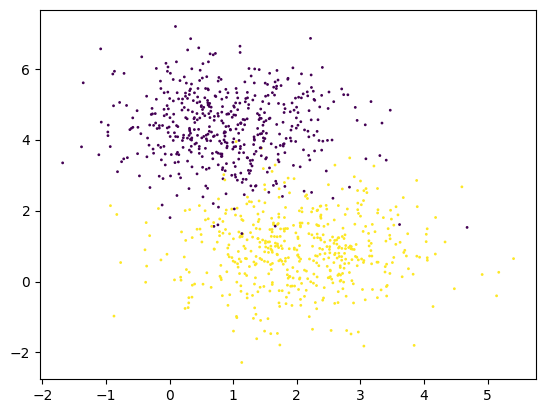

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Générer un grand ensemble de données synthétiques
X, y = make_blobs(n_samples=3000000, centers=2, n_features=2, random_state=0)

# Afficher une partie des données pour visualisation (afficher seulement 1000 points pour des raisons de performance)
plt.scatter(X[:1000, 0], X[:1000, 1], c=y[:1000], s=1, cmap='viridis')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
from sklearn.tree import DecisionTreeClassifier
import time
# Créer une instance de DecisionTreeClassifier
model = DecisionTreeClassifier()

# Entraîner le modèle avec les données d'entraînement
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time
print("Temps d'entraînement:", training_time, "secondes")

profondeur = model.get_depth()
print("Profondeur de l'arbre de décision:", profondeur)

Temps d'entraînement: 38.94347047805786 secondes
Profondeur de l'arbre de décision: 88


In [4]:
from sklearn.metrics import classification_report

# Prédire les étiquettes sur l'ensemble de test
y_pred = model.predict(X_test)

# Imprimer un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    449372
           1       0.94      0.94      0.94    450628

    accuracy                           0.94    900000
   macro avg       0.94      0.94      0.94    900000
weighted avg       0.94      0.94      0.94    900000


In [5]:
# Créer une instance du modèle avec le critère "entropy"
modelEntropy = DecisionTreeClassifier(criterion="entropy")

# Entraîner le modèle
start_time = time.time()
modelEntropy.fit(X_train, y_train)
training_time = time.time() - start_time
print("Temps d'entraînement:", training_time, "secondes")

profondeur = modelEntropy.get_depth()
print("Profondeur de l'arbre de décision:", profondeur)

Temps d'entraînement: 47.79040312767029 secondes
Profondeur de l'arbre de décision: 113


In [6]:
# Prédire les étiquettes sur l'ensemble de test
y_pred_entropy = modelEntropy.predict(X_test)

# Imprimer un rapport de classification
print("Rapport de classification pour le modèle avec criterion='entropy' :")
print(classification_report(y_test, y_pred_entropy))

Rapport de classification pour le modèle avec criterion='entropy' :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    449372
           1       0.94      0.94      0.94    450628

    accuracy                           0.94    900000
   macro avg       0.94      0.94      0.94    900000
weighted avg       0.94      0.94      0.94    900000


Temps d'entraînement du modèle avec criterion='gini': 0.0015132427215576172 secondes
Temps d'entraînement du modèle avec criterion='entropy': 0.0019974708557128906 secondes

Rapport de classification pour le modèle avec criterion='gini' :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Rapport de classification pour le modèle avec criterion='entropy' :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import time

# Chargement de l'ensemble de données Iris
iris = load_iris()
X = iris.data
y = iris.target

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création des deux modèles avec les critères "gini" et "entropy"
model_gini = DecisionTreeClassifier(criterion="gini")
model_entropy = DecisionTreeClassifier(criterion="entropy")

# Entraînement des modèles et mesure du temps d'entraînement
start_time_gini = time.time()
model_gini.fit(X_train, y_train)
training_time_gini = time.time() - start_time_gini

start_time_entropy = time.time()
model_entropy.fit(X_train, y_train)
training_time_entropy = time.time() - start_time_entropy

# Prédictions sur l'ensemble de test et mesure du temps de prédiction
start_time_prediction_gini = time.time()
y_pred_gini = model_gini.predict(X_test)
prediction_time_gini = time.time() - start_time_prediction_gini

start_time_prediction_entropy = time.time()
y_pred_entropy = model_entropy.predict(X_test)
prediction_time_entropy = time.time() - start_time_prediction_entropy

# Rapports de classification
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

# Affichage des résultats
print("Temps d'entraînement du modèle avec criterion='gini':", training_time_gini, "secondes")
print("Temps d'entraînement du modèle avec criterion='entropy':", training_time_entropy, "secondes")
print("\nRapport de classification pour le modèle avec criterion='gini' :")
print(report_gini)
print("\nRapport de classification pour le modèle avec criterion='entropy' :")
print(report_entropy)
